# Etape 1 : Explorer et nettoyer vos données 

### Chercher les valeurs manquantes (cases vides)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

df = pd.read_csv("kc_house_data.csv")
df.info()
pd.set_option('display.max_columns',None)
df.head(10)
#pas de case vide

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Chercher les valeurs dupliquées (plus d'id)

In [5]:
# compter le nombre de maisons
df['id'].value_counts() # montre que certaines maisons ont été vendues plus d'une fois.

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

### Harmoniser les valeurs (format date)

In [6]:
# récrire le format date en supprimant l'heure
df['date']=df['date'].str.slice(0, 8)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Chercher les valeurs abbérantes

#### 1. Prix de la maison en fonction de sa taille ==> plus une maison est grande plus elle coûte chère

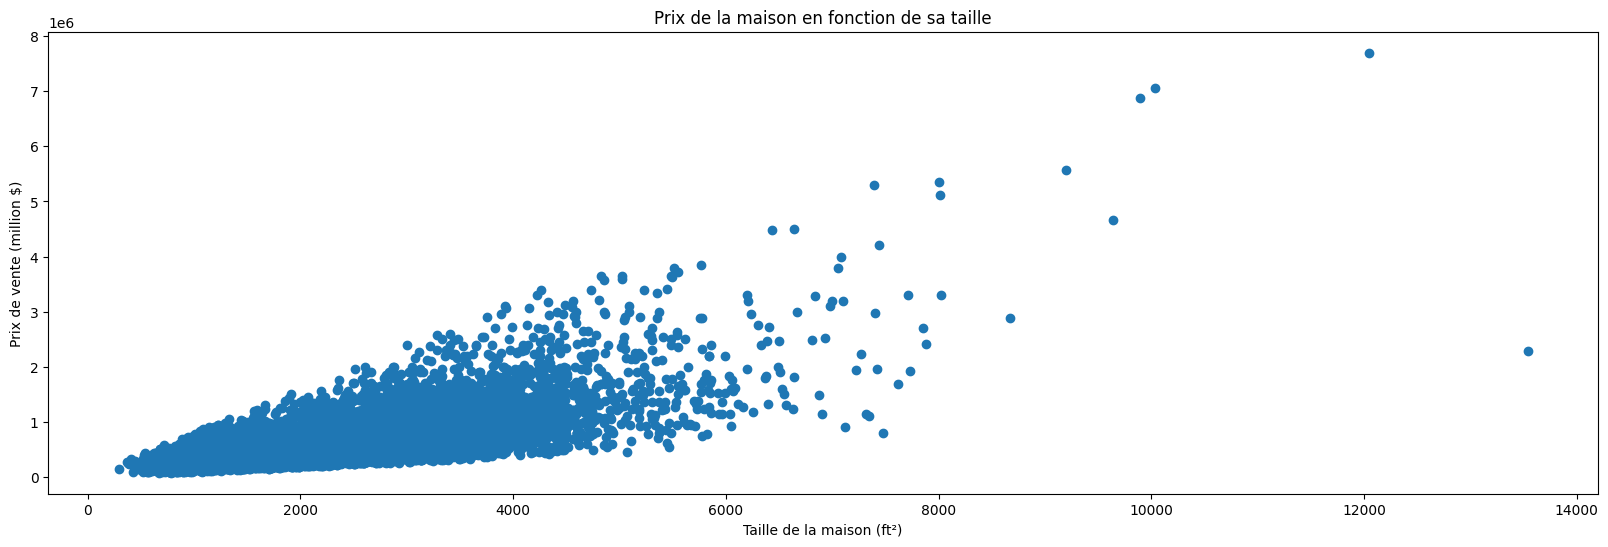

In [7]:
# Créer un graphique à nuages pour afficher les données
plt.figure(figsize=(20,6))

# Créer un graphique de nuages en utilisant les données de longueur et de largeur de la pétale
#sns.relplot(data=df,x='sqm_living', y='price', hue='id')
plt.scatter(df["sqft_living"], df["price"])
# plt.scatter(df["sqm_living"], df["price"])
plt.xlabel("Taille de la maison (ft²)")
plt.ylabel("Prix de vente (million $)")
plt.title('Prix de la maison en fonction de sa taille')

# Afficher le graphique
plt.show()


On peut voir que le prix moyen est d'environ 540 000 dollars, mais la distribution des prix est large, avec un écart-type de 367 127 dollars et une plage allant de 75 000 dollars à 7 700 000 dollars. Les quartiles montrent que 50 % des maisons sont vendues entre 321 950 dollars et 645 000 dollars.

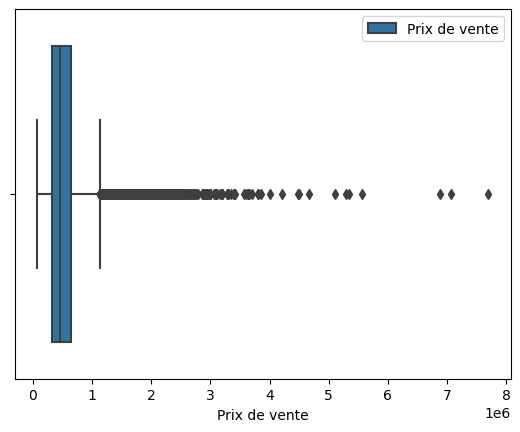

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


(21613, 21)

In [8]:
sns.boxplot(x=df['price'])
plt.xlabel("Prix de vente")
plt.legend(labels=['Prix de vente'])

plt.show()

print(df['price'].describe())
df.shape

##### supprimer les maisons dont les prix sont supérieurs à 4 millions et inférieurs à 1 million et supérificie supérieure à 12 000

In [9]:
print((df['sqft_living'] >=8000).sum())

10


In [10]:
da = df[(df['price'] < 4000000) & (df['price'] > 100000) & (df['sqft_living'] < 8000)]
da.shape

(21567, 21)

### 2. Afficher le nombre de chambres par superficie

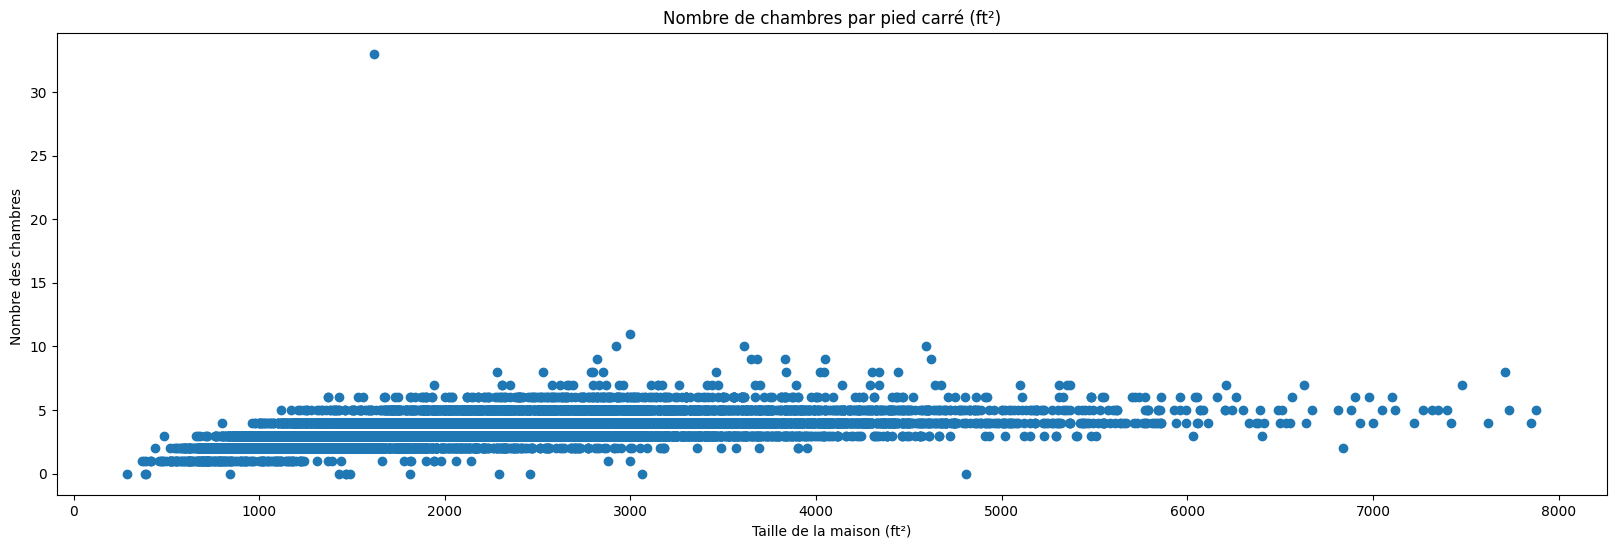

In [11]:
# Créer un graphique à nuages pour afficher les données
plt.figure(figsize=(20,6))

# Créer un graphique de nuages en utilisant les données de longueur et de largeur de la pétale
#sns.relplot(data=df,x='sqm_living', y='price', hue='id')

plt.scatter(da["sqft_living"], da["bedrooms"])

# plt.scatter(df["sqm_living"], df["price"])
plt.xlabel("Taille de la maison (ft²)")
plt.ylabel("Nombre des chambres ")
plt.title('Nombre de chambres par pied carré (ft²)')

# Afficher le graphique
plt.show()

On peut voir que le nombre de chambre moyen est à 3.37, mais la distribution des chambres est large, avec un écart-type de 0.93 et une plage allant de 0 chambre à  33 chambres. Les quartiles montrent que 50 % des maisons ont entre 3 chambres et 4 chambres.

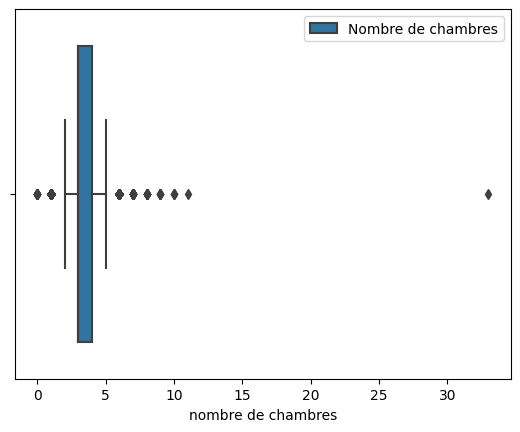

count    21567.000000
mean         3.371493
std          0.927833
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


(21613, 21)

In [12]:
sns.boxplot(x=da['bedrooms'])
plt.xlabel("nombre de chambres")
plt.legend(labels=['Nombre de chambres'])

plt.show()


print(da['bedrooms'].describe())
df.shape

##### supprimer les maisons avec plus de 10 chambres

In [13]:
db = da[(df['bedrooms'] <= 10)]
db.shape

/tmp/ipykernel_13625/583996929.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  db = da[(df['bedrooms'] <= 10)]


(21565, 21)

### 3. Superficie moyenne par nombre de chambres de 0 à 10 chambres

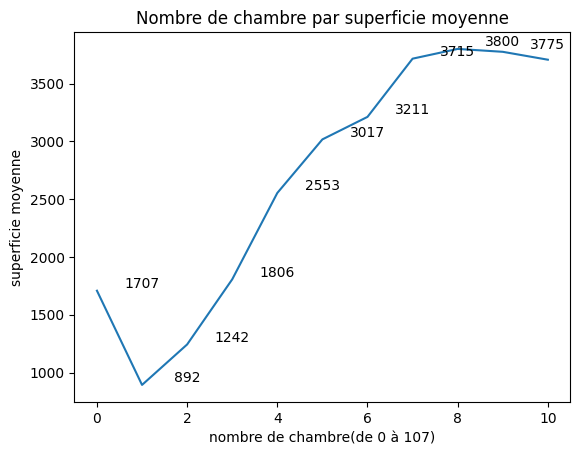

In [14]:
# Calculer la superficie moyenne pour chaque nombre de chambre
db_mean = db.groupby("bedrooms")["sqft_living"].mean().reset_index()

# Créer une ligne/courbe pour afficher les données
plt.plot(db_mean["bedrooms"], db_mean["sqft_living"])

# Ajouter les prix moyens sur chaque nuage de point
for i, sqft_living in enumerate(db_mean['sqft_living']):
    plt.annotate(f"{int(sqft_living)}", (i+1, sqft_living), ha='center', va='bottom')

# Ajouter des étiquettes d'axe et un titre    
plt.title('Nombre de chambre par superficie moyenne')
plt.xlabel("nombre de chambre(de 0 à 107)")
plt.ylabel("superficie moyenne")

# Afficher le graphique
plt.show()


### 3. Nombre de vente en fonction de la latitude et la longitude

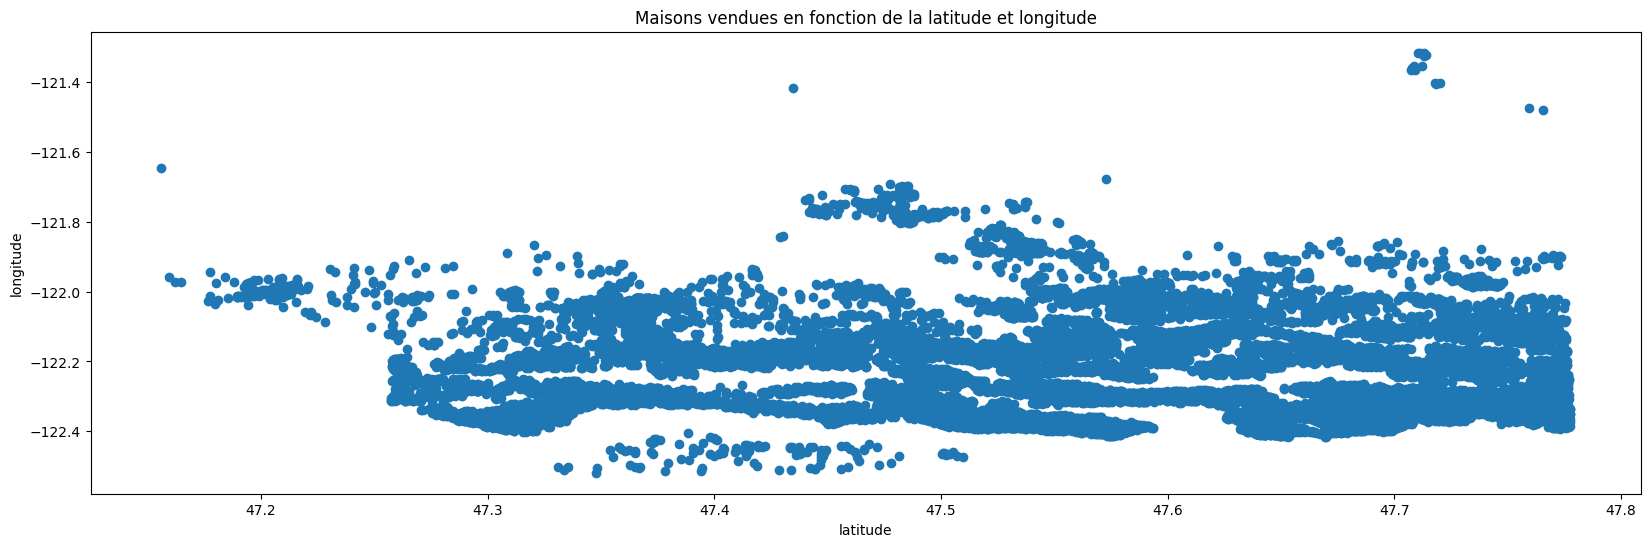

In [15]:
# Créer un graphique à nuages pour afficher les données
plt.figure(figsize=(20,6))

# Créer un graphique de nuages en utilisant les données de longueur et de largeur de la pétale
# sns.relplot(data=df,x='lat', y='long', hue='id')
plt.scatter(db["lat"], db["long"])

# Ajouter des étiquettes d'axe et un titre
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Maisons vendues en fonction de la latitude et longitude')

# Afficher le graphique
plt.show()

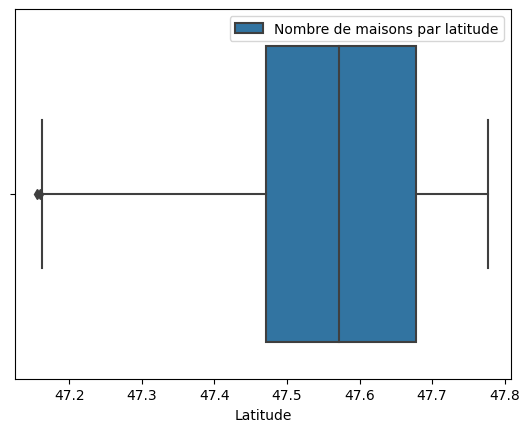

count    21565.000000
mean        47.560173
std          0.138559
min         47.155900
25%         47.471100
50%         47.571900
75%         47.678100
max         47.777600
Name: lat, dtype: float64


(21565, 21)

In [16]:
sns.boxplot(x=db['lat'])
plt.xlabel("Latitude")
plt.legend(labels=['Nombre de maisons par latitude'])

plt.show()

print(db['lat'].describe())
db.shape

Supprimer les maisons dont la latitude est inférieure à 47.20

In [17]:
print((db['lat'] < 47.2).sum())

82


In [18]:
dc = db[(df['lat'] > 47.2)]
dc.shape

/tmp/ipykernel_13625/3365963345.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dc = db[(df['lat'] > 47.2)]


(21483, 21)

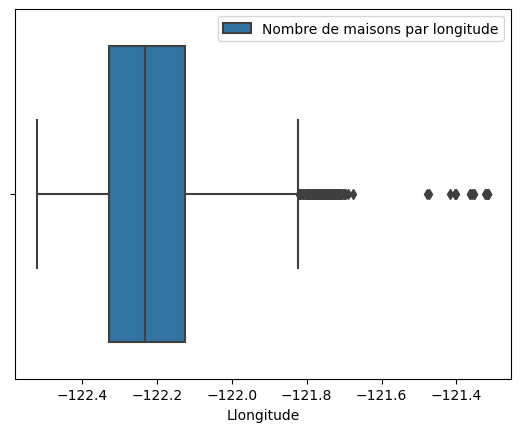

count    21483.000000
mean      -122.214673
std          0.140473
min       -122.519000
25%       -122.329000
50%       -122.231000
75%       -122.126000
max       -121.315000
Name: long, dtype: float64


(21483, 21)

In [19]:
sns.boxplot(x=dc['long'])
plt.xlabel("Llongitude")
plt.legend(labels=['Nombre de maisons par longitude'])

plt.show()

print(dc['long'].describe())
dc.shape

Supprimer les maisons dont la longitude est supérieur à -121.6

In [20]:
print((dc['long'] > -121.6).sum())

17


In [21]:
de = dc[(dc['long'] < - 121.6)]
de.shape

(21466, 21)

### 4. Prix de vente moyen d’une maison en fonction de son état général.

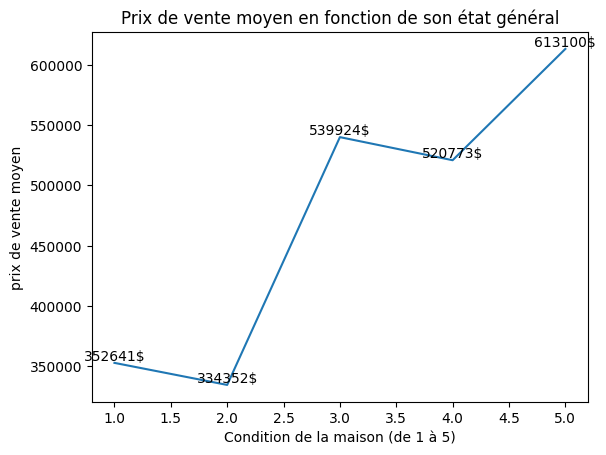

In [22]:
# Calculer le prix de vente moyen de la maison en focnction de son état général
de_mean_condition = de.groupby("condition")["price"].mean().reset_index()

# Créer une ligne/courbe pour afficher les données
plt.plot(de_mean_condition["condition"], de_mean_condition["price"])

# Ajouter les prix moyens sur chaque nuage de point
for i, price in enumerate(de_mean_condition["price"]):
    plt.annotate(f"{int(price)}$", (i+1, price), ha='center', va='bottom')

# Ajouter des étiquettes d'axe et un titre    
plt.title('Prix de vente moyen en fonction de son état général')
plt.xlabel("Condition de la maison (de 1 à 5)")
plt.ylabel("prix de vente moyen")

# Afficher le graphique
plt.show()



### 5. Prix de vente moyen d’une maison en fonction de la qualité globale de la construction et du design

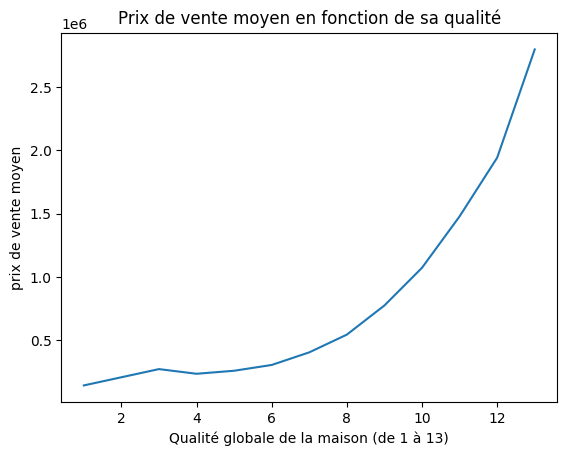

In [23]:
# Calculer le prix de vente moyen de la maisons en fonction de sa grade
de_mean_grade = de.groupby("grade")["price"].mean().reset_index()

# Créer une ligne/courbe pour afficher les données
plt.plot(de_mean_grade["grade"], de_mean_grade["price"])

# Ajouter des étiquettes d'axe et un titre    
plt.title('Prix de vente moyen en fonction de sa qualité')
plt.xlabel("Qualité globale de la maison (de 1 à 13)")
plt.ylabel("prix de vente moyen")

# Afficher le graphique
plt.show()

### 6. Prix de vente moyen d’une maison en fonction de sa vue

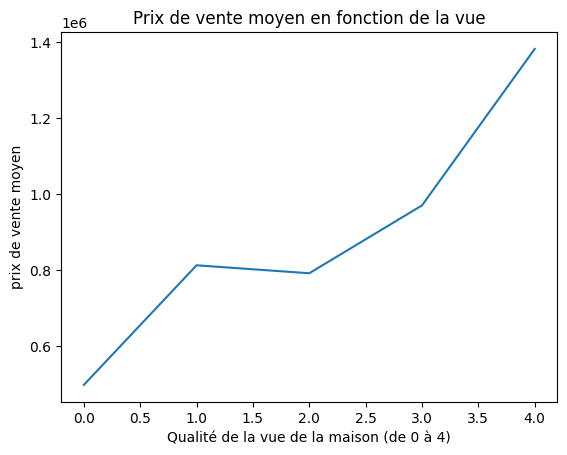

In [25]:
# Calculer le prix de vente moyen de la maisons en fonction de sa vue
de_mean_grade = de.groupby("view")["price"].mean().reset_index()

# Créer une ligne/courbe pour afficher les données
plt.plot(de_mean_grade["view"], de_mean_grade["price"])

# Ajouter des étiquettes d'axe et un titre    
plt.title('Prix de vente moyen en fonction de la vue')
plt.xlabel("Qualité de la vue de la maison (de 0 à 4)")
plt.ylabel("prix de vente moyen")

# Afficher le graphique
plt.show()

### 7. Prix de vente moyen d’une maison en fonction de sa vue sur l'eau

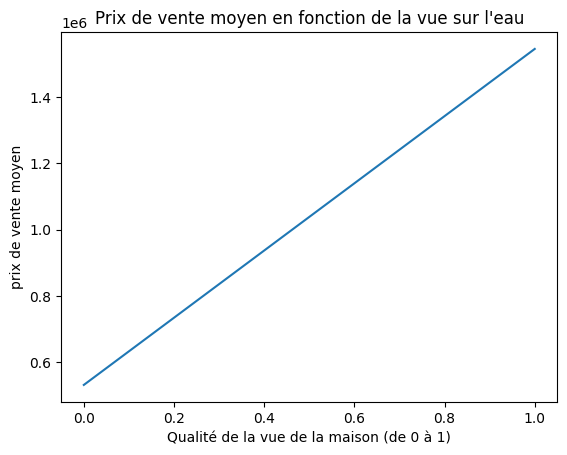

In [28]:
# Calculer le prix de vente moyen de la maisons en fonction de sa vue sur l'eau
de_mean_grade = de.groupby("waterfront")["price"].mean().reset_index()

# Créer une ligne/courbe pour afficher les données
plt.plot(de_mean_grade["waterfront"], de_mean_grade["price"])

# Ajouter des étiquettes d'axe et un titre    
plt.title('Prix de vente moyen en fonction de la vue sur l\'eau')
plt.xlabel("Qualité de la vue de la maison (de 0 à 1)")
plt.ylabel("prix de vente moyen")

# Afficher le graphique
plt.show()

### 8. Prix de vente moyen d’une maison en fonction de l’année de construction

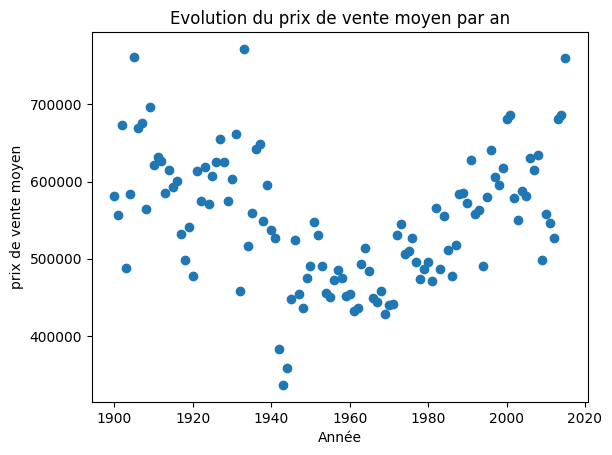

In [250]:
# Calculer le prix de vente moyen par année de contruction
plot = plot = de.groupby("yr_built")["price"].mean()

# Créer un graphique à nuages pour afficher les données
plt.scatter(np.unique(de["yr_built"]), plot)


# Ajouter des étiquettes d'axe et un titre
plt.title('Evolution du prix de vente moyen par an')
plt.xlabel("Année")
plt.ylabel("prix de vente moyen")

# Afficher le graphique
plt.show()

### 9. Evolution du prix de vente moyen d’une maison par année de vente

/tmp/ipykernel_13625/1516359330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de['yr_sale']=de['date'].str.slice(0, 4)


NameError: name 'plot' is not defined

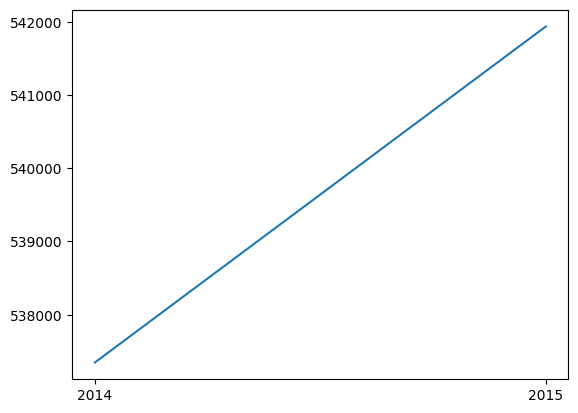

In [29]:
#  Créer une nouvelle colonne année de vente
de['yr_sale']=de['date'].str.slice(0, 4)

# Calculer le prix de vente moyen par année de vente
de_mean_yr_sale = de.groupby("yr_sale")["price"].mean().reset_index()

plt.plot(de_mean_yr_sale["yr_sale"], de_mean_yr_sale["price"])

# Ajouter les prix moyens sur chaque nuage de point
for i, price in enumerate(plot):
    plt.annotate(f"{int(price)}$", (i+1, price), ha='center', va='bottom')

# Ajouter des étiquettes d'axe et un titre    
plt.title('Evolution du prix de vente moyen')
plt.xlabel("Année de vente")
plt.ylabel("prix de vente moyen")

# Afficher le graphique
plt.show()

# Après suppression des valeurs abérantes, enregistrer les donnée dans un nouveau fichier CSV

In [252]:
# Enregistrer les données dans un nouveau fichier CSV
de = de.to_csv('house_data.csv', index=False)

##### Les zip code de seattle sur une map

In [253]:
import pandas as pd
import folium
import json

# Charger les données du fichier CSV
df_kc_house = pd.read_csv('house_data.csv')

# Calculer les moyennes de prix par quartier
avg_prices = df_kc_house.groupby('zipcode')['price'].mean().reset_index()

# Charger le fichier GeoJSON pour les codes postaux
with open('wa_washington_zip_codes_geo.min.json') as mon_fichier:
    geo_json_data = json.load(mon_fichier)

# Créer une carte centrée sur Seattle
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Ajouter les polygones pour chaque quartier
folium.Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=avg_prices,
    columns=['zipcode', 'price'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Price'
).add_to(m)

# Ajouter le contrôle de couches
folium.LayerControl().add_to(m)

# Afficher la carte
m

ImportError: cannot import name 'COMMON_SAFE_ASCII_CHARACTERS' from 'charset_normalizer.constant' (/home/apprenant/miniconda3/envs/machinelearning/lib/python3.10/site-packages/charset_normalizer/constant.py)

#### Obtenez une clef d'API Google Map

In [254]:
import pandas as pd

from bokeh.io import output_notebook

output_notebook()
bokeh_width, bokeh_height = 500,400

df = pd.read_csv('house_data.csv')
df.head()



Loading BokehJS ...

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sale
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


#### Carte Google Map Dynamique dans un Notebook Jupyter